Please follow the instructions carefully. Write all your code in a `Code` cell, and your explanations in a `Markdown` cell. Make sure that your code compiles correctly either by selecting a given cell and clicking the `Run` button, or by hitting `shift`+`enter` or `shift`+`return`.

### 1. Import `numpy`, `numpy.linalg`, `matplotlib.pyplot`, and `pandas`. Use the appropriate aliases when importing these modules.

In [68]:
# code for question 1
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd


### 2. Load the data from the file named `data_stock_returns.csv` into a `DatFrame` called `returns`. The file `data_stock_returns.csv` contains daily returns of a number of stocks selected from the S&P 500 universe. The rows of the csv file represent the returns over a number of days, and the columns represent individual stocks labeled by their NYSE ticker symbol, e.g., Apple stock is labeled `AAPL`.

In [225]:
# code for question 2
returns = pd.read_csv("data_stock_returns (1).csv")

### 3. View the `head` of the `returns` `DataFrame`

In [212]:
# code for question 3
print(returns.head())

         Date      ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
0  2019-01-02  0.009829  0.010542  0.009354  0.018961 -0.006221  0.043115   
1  2019-01-03 -0.036155 -0.001703  0.007825  0.004524 -0.024525 -0.005824   
2  2019-01-04  0.039127  0.051651  0.033218  0.027974  0.030381  0.017754   
3  2019-01-07  0.027806 -0.004204 -0.010668  0.021706  0.008630  0.014810   
4  2019-01-08  0.029859 -0.002524  0.008152  0.025441  0.007748  0.026410   

      DISCK      DISH        EA  ...       NEE        NI       NRG       PEG  \
0  0.031979  0.035795  0.018333  ... -0.023222 -0.011107 -0.038352 -0.023718   
1  0.002515  0.020651 -0.020871  ... -0.002476  0.001196 -0.009491 -0.000197   
2  0.019072  0.068034  0.070034  ...  0.018249  0.017378  0.033601  0.010764   
3  0.014271  0.011252  0.036862  ... -0.001450  0.005467  0.009179  0.002139   
4  0.020041  0.002793  0.016194  ...  0.007287  0.018519  0.015114  0.003878   

        PNW       PPL        SO       SRE       WEC     

### 4. View the `tail` of the `returns` `DataFrame`

In [213]:
# code for question 4
print(returns.tail())

           Date      ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
247  2019-12-24 -0.001359  0.000291  0.009703 -0.002277  0.004207  0.003943   
248  2019-12-26  0.001359  0.010077  0.009833 -0.003807  0.002818  0.007540   
249  2019-12-27  0.005081 -0.004209  0.002887  0.023371  0.000343 -0.004517   
250  2019-12-30 -0.005251 -0.001262  0.001772 -0.024134 -0.013678 -0.011231   
251  2019-12-31  0.009129  0.004132 -0.004659  0.008362  0.005964 -0.000611   

        DISCK      DISH        EA  ...       NEE        NI       NRG  \
247  0.007496  0.001956  0.007026  ...  0.007219 -0.000729 -0.004752   
248  0.004212  0.008617 -0.000369  ...  0.006011 -0.002921 -0.016684   
249 -0.005511 -0.004994 -0.000738  ...  0.002271 -0.002196  0.000000   
250 -0.008161 -0.015700 -0.013930  ... -0.005043  0.008393  0.000000   
251 -0.000656  0.002258  0.005409  ...  0.003599  0.011561  0.013168   

          PEG       PNW       PPL        SO       SRE       WEC       XEL  
247 -0.001537 -0

### 5. How many stocks are in this `DataFrame`?

In [214]:
# code for question 5
print(returns.shape[1]-1)

488


**ANSWER FOR QUESTION 5**: (double click here and type your answer) There are 488 stocks in this DataFrame

### 6. Over how many days are these stock returns reported?

In [215]:
# code for question 6
print(returns.shape[0])

252


**ANSWER FOR QUESTION 6**: (double click here and type your answer) There are 252 stocks in this DataFrame

### 7. Extract the returns of the Amazon stock only, which has a ticker symbol `AMZN`. Save it in a `Series` called `amzn_returns`.

In [226]:
# code for question 7
amzn_returns = pd.Series(returns["AMZN"])

### 8. Plot the Amazon stock returns extracted in the above cell. 

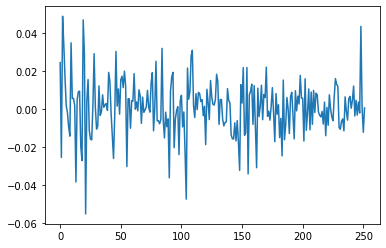

In [227]:
# code for question 8
plt.plot(amzn_returns)

### 9. Plot the cumulative sum of the Amazon stock returns using the method `.cumsum()` which acts directly on the `amzn_returns` `Series`.

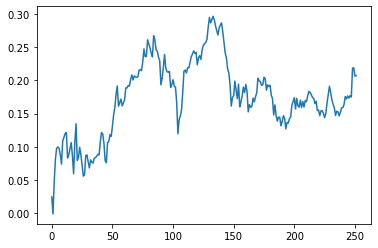

In [228]:
# code for question 9
plt.plot(amzn_returns.cumsum())

In [229]:
# the module below will allow us to perform linear regression
import statsmodels.api as sm

The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [230]:
def lin_reg(x, y):
    '''
    ordinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

### 10. Let's try to use the above function. Extract (as numpy array) the stock returns of:

- Apple (ticker symbol `AAPL`) and call it `aapl`
- Intel (ticker symbol `INTC`) and call it `intc`
- Microsoft (ticker symbol `MSFT`) and call it `msft`
- IBM (ticker symbol `IBM`) and call it `ibm`

### Let `y` be the Apple stock returns, and `x` be the Intel stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x$. 

In [234]:
# code for question 10

aapl = returns["AAPL"].to_numpy()
intc = returns["INTC"].to_numpy()
msft = returns["MSFT"].to_numpy()
ibm = returns["IBM"].to_numpy()

lin_reg(intc,aapl)

(array([0.00195633, 0.53526326]),
 array([-2.52404291e-03, -7.65933995e-02,  7.97028504e-03, -6.67246823e-03,
         1.35529430e-02,  1.18641773e-02, -4.86231162e-03, -1.58858897e-02,
        -1.07247855e-02,  1.55432797e-02,  1.53879143e-02,  1.95803633e-04,
        -3.70848711e-03, -1.45523640e-02,  5.75186562e-03, -2.98588472e-02,
         6.07322952e-02, -7.48569899e-03, -1.04235826e-02,  5.27654517e-02,
         9.96878256e-03, -1.94589822e-02,  2.06971946e-02,  6.48551194e-03,
        -3.81541327e-03, -1.38417615e-02,  3.47531369e-03, -6.95626072e-03,
        -6.81518375e-03, -1.10207955e-02, -1.91331554e-03, -1.30640488e-02,
         3.73241073e-03,  4.56260586e-03, -7.81909133e-03, -1.98071888e-03,
        -8.82835545e-04, -2.69138170e-03,  1.03604149e-03, -9.01844862e-03,
         5.07437855e-03, -3.32813700e-03, -1.19160641e-03, -3.97791181e-04,
        -1.00485727e-02,  1.64015048e-03,  2.32986478e-02,  7.01368073e-03,
        -5.47843767e-03,  1.83338490e-02,  2.12697114e

### 11. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of the actual Apple returns. How well do the Intel stock returns describe the Apple stock returns? Answer this question using a quantitative measure of choice to describe how well the regression describes the actual data (you should research what is standard procedure in answering these types of questions).

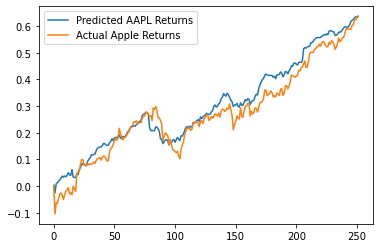

In [235]:
# code for question 11

aapl_predicted_returns = .001956 + .535263*intc
plt.plot(aapl_predicted_returns.cumsum(),label = "Predicted AAPL Returns")
plt.plot(aapl.cumsum(),label = "Actual Apple Returns")
plt.legend()
plt.show()

**ANSWER FOR QUESTION 11**: (double click here and type your answer)


### 12. Now, let `y` be the Apple stock returns, and `x` be the Intel, Microsoft, and IBM stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$, where $x_1$ represents Intel returns, $x_2$ represents Microsoft returns, and $x_3$ represents IBM returns. 

In [278]:
# code for question 12
y = aapl
x = returns[["INTC","MSFT","IBM"]]
z = lin_reg(x,y)
print(z)

(const    0.001116
INTC     0.284141
MSFT     0.543723
IBM      0.150586
dtype: float64, 0     -0.000494
1     -0.066546
2     -0.006721
3     -0.006419
4      0.009922
         ...   
247   -0.000290
248    0.012216
249   -0.004122
250    0.014456
251    0.003302
Length: 252, dtype: float64, 0.4704730705676301)


/Users/noahlapoint/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 13. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of actual Apple returns. How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns? Answer this question using a quantitative measure of choice to describe how well the regression describes the actual data (you should research what is standard procedure in answering these types of questions).

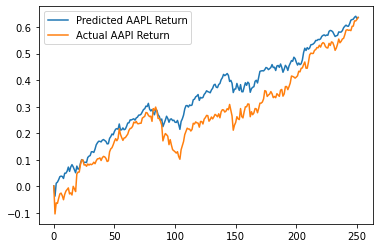

In [241]:
# code for question 13
aapl_predicted_returns = .001116 + (.284141*intc) + (.543723*msft) + (.150586*ibm)

plt.plot(aapl_predicted_returns.cumsum(),label = "Predicted AAPL Return")
plt.plot(aapl.cumsum(),label = "Actual AAPl Return")
plt.legend()
plt.show()

**ANSWER FOR QUESTION 13**: (double click here and type your answer) The r value shows correlation. The closer that the r value is to 1, the better the data is predicted. The R value that we get is .47 which is said to indicate a moderate posotive linear relationship. Therefore, it is not the best predictor of the returns, however it was a servicable predicter.



The file `SPY.csv` contains the prices of SPDR S&P 500 ETF Trust. This Exchange Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index. 

### 14. Load `SPY.csv` into a DataFrame called `spy_prices` using the `read_csv` method in `pandas`. Make sure to make the 'Date' column to be your index column. To do that, read the docstring for `read_csv`. 

In [243]:
# code for question 14
spy_prices = pd.read_csv("SPY.csv",index_col = "Date")

### 15. Once you have downloaded the file into the `DataFrame`, observe all the available prices and dates. Show the head and tail of the `DataFrame`, and then answer the following questions:

(a) Which types of prices are reported? 

(b) From which date to which date are these prices reported (in the entire DataFrame)?

In [246]:
# code for question 15
print(spy_prices.head())
print(spy_prices.tail())

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-01-02  206.880005  204.179993  206.380005  205.429993  121465900.0   
2015-01-05  204.369995  201.350006  204.169998  201.720001  169632600.0   
2015-01-06  202.720001  198.860001  202.089996  199.820007  209151400.0   
2015-01-07  202.720001  200.880005  201.419998  202.309998  125346700.0   
2015-01-08  206.160004  203.990005  204.009995  205.899994  147217800.0   

             Adj Close  
Date                    
2015-01-02  184.260223  
2015-01-05  180.932541  
2015-01-06  179.228363  
2015-01-07  181.461731  
2015-01-08  184.681763  
                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-05-26  302.190002  295.459991  301.929993  299.079987   88951400.0   
2020-05-27  303.570007  296.869995  302.119995  303.529999  104817400.0   

**ANSWER FOR QUESTION 15**: (double click here and type your answer)

(a) The prices reported are low, high, open, close, and volume 

(b) The dates are reported from 2015-01-02 up to 2020-06-01

### 16. Retain only the Adjusted Close price in the `spy_prices` `DataFrame`. Call the resulting `Series` `spy_adjclose`.

In [247]:
# code for question 16
spy_adjclose = pd.Series(spy_prices["Adj Close"])
#spy_dates = pd.Series(spy_prices["Date"])
print(spy_adjclose)

Date
2015-01-02    184.260223
2015-01-05    180.932541
2015-01-06    179.228363
2015-01-07    181.461731
2015-01-08    184.681763
                 ...    
2020-05-26    297.769623
2020-05-27    302.200134
2020-05-28    301.642609
2020-05-29    302.986694
2020-06-01    304.211273
Name: Adj Close, Length: 1362, dtype: float64


### 17. Now, using the `pct_change` method in `pandas`, compute the returns on the Adjusted Close prices of SPY, and only retain the returns from '2019-01-01' to '2020-01-01'. Call the `Series` obtained `spy_returns`.

In [249]:
# code for question 17
spy_returns = spy_adjclose.pct_change()
spy_returns = spy_returns.loc['2019-01-01':'2020-01-01']
print(spy_returns)

Date
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 252, dtype: float64


### 18. Perform SVD on `returns` data that contain assets from the S&P 500, and save the left singular vectors in an array called `U`, the singular values in an array called `sing_vals`, and the right singular vectros in an array called `V`. Retain the left singular vector corresponding to the largest singular value and call is `u_sigma1`.

In [251]:
# code for question 18
U,sing_vals,V = la.svd(returns.iloc[:,1:].to_numpy())
u_sigmal = U[:,[0]]
u_sigmal


array([[-2.61377831e-02],
       [ 1.61545283e-01],
       [-2.39072521e-01],
       [-8.50919141e-02],
       [-6.50519613e-02],
       [-6.54989459e-02],
       [-3.42081872e-02],
       [-9.61532142e-03],
       [ 2.61106863e-02],
       [-3.66516290e-02],
       [-2.17256697e-02],
       [-6.56591169e-02],
       [-1.13175003e-01],
       [ 1.12292114e-01],
       [ 1.46262775e-02],
       [-5.27029066e-02],
       [-9.20756297e-02],
       [ 4.15309183e-02],
       [-4.19965671e-03],
       [-8.25840670e-02],
       [-3.85878070e-02],
       [-2.64600711e-02],
       [-3.59552764e-02],
       [-2.74447318e-02],
       [-2.07249932e-03],
       [ 6.85491747e-02],
       [-4.53474533e-03],
       [-2.22774569e-02],
       [-9.29941909e-02],
       [-3.39398663e-02],
       [ 1.32384003e-02],
       [-7.90552361e-02],
       [-1.16513989e-02],
       [-2.66305482e-02],
       [ 3.52424919e-02],
       [-4.31805646e-02],
       [-1.29146535e-02],
       [ 2.38675368e-02],
       [ 7.1

### 19. `u_sigma1` is thought to track the market. To test that, we will perform a regression of `spy_returns` against this first left singular vector by letting `y=spy_returns` and `x=u_sigma1` and computing

### $$ y = \beta_0 + \beta_1 x$$
### using least squares regression.

In [252]:
# code for question 19
lin_return = lin_reg(u_sigmal,spy_returns)
print(lin_return[0:4])

(const    0.000346
x1      -0.118992
dtype: float64, Date
2019-01-02   -0.002416
2019-01-03   -0.004987
2019-01-04    0.004702
2019-01-07   -0.002587
2019-01-08    0.001308
                ...   
2019-12-24   -0.000267
2019-12-26    0.003130
2019-12-27    0.001098
2019-12-30   -0.002383
2019-12-31   -0.000872
Length: 252, dtype: float64, 0.8987899218671398)


### 20. Plot the cumulative sum of the result from the regression on top of the cumulative sum of `spy_returns`. What do you notice? Answer this question using a quantitative measure of choice to describe how well the regression describes the actual data (you should research what is standard procedure in answering these types of questions).

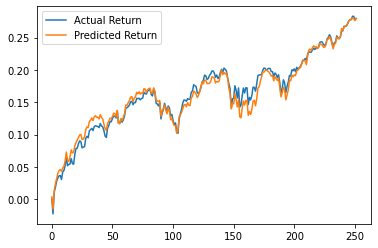

In [253]:
# code for question 20
plt.plot(spy_returns.values.cumsum(), label = "Actual Return")
svd_return = 0.000346 + (-.118892*u_sigmal)
plt.plot(svd_return.cumsum(), label = "Predicted Return")
plt.legend()
plt.show()

**ANSWER FOR QUESTION 20**: (double click here and type your answer) The r value for this predicted return is very accurate. The r value for the correlation was .89 which is on the cusp of being considered a "high positve" which is resembles a very strong correlation. Therefore, our predicted returns accuratly predicts the actual data.

# Congratulations! You have just implemented your first PCA regression to describe the returns on the S&P 500. Now let's shift gears a little and see how singular values and singular vectors of returns matrices are connected to eigenvalues and eigenvectors of correlation matrices.

### 21. Compute the standardized returns of the S&P 500 and save you answer in a `DataFrame` called `sp500_standardized_returns`.

In [265]:
# code for question 21
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

sp500_standardized_returns = pd.DataFrame(returns)
sp500_standardized_returns = scalar.fit_transform(returns.iloc[:,1:])
print(sp500_standardized_returns)
#sp_500_standardized_returns = fit_transform(returns.ilic[:,1:])

[[ 3.92494232e-01  6.24513871e-01  6.84147031e-01 ... -1.60395134e+00
  -2.87547025e+00 -2.52365060e+00]
 [-1.65140133e+00 -2.82494748e-01  5.56439479e-01 ...  3.40506652e-01
   1.57027283e-01 -5.63771321e-01]
 [ 1.69473766e+00  3.66965971e+00  2.67726170e+00 ...  3.04894749e+00
   6.79836478e-01  9.60814415e-01]
 ...
 [ 1.81464451e-01 -4.68113386e-01  1.43982643e-01 ... -1.42805177e-04
   5.38670431e-01  4.59960899e-01]
 [-2.77789910e-01 -2.49835924e-01  5.09136066e-02 ... -2.77008694e-02
  -3.08472816e-01  1.75651312e-01]
 [ 3.61388549e-01  1.49682419e-01 -4.86207479e-01 ...  1.51717717e-01
  -6.68353263e-02  2.27496608e-01]]


### 22. Perform SVD on `sp500_standardized_returns` data and save the singular values in an array called `singvals_standardized_returns`.

In [266]:
# code for question 22
u, s, v = la.svd(sp500_standardized_returns)
singvals_standardized_returns = np.array(s)
print(singvals_standardized_returns)

[1.86001557e+02 1.06919052e+02 5.98649885e+01 5.12562213e+01
 4.65490417e+01 4.38253882e+01 4.21295971e+01 3.95359508e+01
 3.87699299e+01 3.55193801e+01 3.43690803e+01 3.36649746e+01
 3.32115707e+01 3.28051575e+01 3.12508994e+01 3.08198477e+01
 3.05592132e+01 3.01477638e+01 2.97346314e+01 2.89399088e+01
 2.85982004e+01 2.82637384e+01 2.80699382e+01 2.79278568e+01
 2.75055507e+01 2.67591886e+01 2.66842755e+01 2.63813368e+01
 2.62003307e+01 2.58056198e+01 2.57115621e+01 2.53415161e+01
 2.50746676e+01 2.49603400e+01 2.46974069e+01 2.44905732e+01
 2.41119272e+01 2.39184866e+01 2.37580438e+01 2.35317665e+01
 2.33556813e+01 2.32075023e+01 2.31305287e+01 2.30934475e+01
 2.27308125e+01 2.26380344e+01 2.23226419e+01 2.21984587e+01
 2.20704957e+01 2.17464308e+01 2.16733661e+01 2.16203947e+01
 2.13494641e+01 2.11212868e+01 2.09514203e+01 2.08095259e+01
 2.07077521e+01 2.02830105e+01 2.02521596e+01 2.01509469e+01
 2.00153349e+01 1.99590396e+01 1.98344943e+01 1.97579110e+01
 1.96408140e+01 1.943947

### 23. Compute the correlation matrix of the S&P 500 returns and save the result as a `DataFrame` called `sp500_corr`. It is easiest to use the built in `pandas` method to compute correlation matrices. 

In [268]:
# code for question 23

sp500_corr = pd.DataFrame.corr(returns)
print(sp500_corr)

           ATVI      CHTR     CMCSA       CTL       DIS     DISCA     DISCK  \
ATVI   1.000000  0.206918  0.262801  0.077612  0.204631  0.167902  0.182100   
CHTR   0.206918  1.000000  0.505437  0.154453  0.269021  0.297209  0.304711   
CMCSA  0.262801  0.505437  1.000000  0.176776  0.369520  0.347829  0.354896   
CTL    0.077612  0.154453  0.176776  1.000000  0.105414  0.365380  0.371403   
DIS    0.204631  0.269021  0.369520  0.105414  1.000000  0.267041  0.294375   
...         ...       ...       ...       ...       ...       ...       ...   
PPL    0.068130  0.143166  0.232142  0.125933  0.094228  0.119023  0.107557   
SO     0.027154  0.082080  0.130291 -0.061925  0.150702 -0.108276 -0.099986   
SRE    0.114697  0.185263  0.169756  0.024476  0.249978  0.038471  0.055280   
WEC    0.010774  0.138888  0.105805 -0.169695  0.119923 -0.172918 -0.169914   
XEL    0.038000  0.184257  0.193725 -0.117967  0.195905 -0.110884 -0.109743   

           DISH        EA        FB  ...       NEE 

### 24. Compute the eigenvalues and eigenvectors of the correlation matrix. Save the results in arrays called `eigvals_corr` and `eigvecs_corr`. How are the eigenvalues of `sp500_corr` related to the singular values of `sp500_standardized_returns`? You should derive this result theoretically.

In [276]:
# code for question 24
eigvals_corr = np.array(sp500_corr)
eigvals_corr, eigvecs_corr = la.eig(eigvals_corr)

print(eigvals_corr)
print(eigvecs_corr)

[ 1.37288012e+02+0.00000000e+00j  4.53638240e+01+0.00000000e+00j
  1.42214954e+01+0.00000000e+00j  1.04253977e+01+0.00000000e+00j
  8.59846542e+00+0.00000000e+00j  7.62168512e+00+0.00000000e+00j
  7.04326569e+00+0.00000000e+00j  6.20274367e+00+0.00000000e+00j
  5.96471216e+00+0.00000000e+00j  5.00645381e+00+0.00000000e+00j
  4.68743525e+00+0.00000000e+00j  4.49734331e+00+0.00000000e+00j
  4.37701758e+00+0.00000000e+00j  4.27054905e+00+0.00000000e+00j
  3.87547109e+00+0.00000000e+00j  3.76929768e+00+0.00000000e+00j
  3.70581553e+00+0.00000000e+00j  3.60669707e+00+0.00000000e+00j
  3.50852501e+00+0.00000000e+00j  3.32348541e+00+0.00000000e+00j
  3.24546454e+00+0.00000000e+00j  3.16999567e+00+0.00000000e+00j
  3.12667234e+00+0.00000000e+00j  3.09509993e+00+0.00000000e+00j
  3.00220365e+00+0.00000000e+00j  2.84148481e+00+0.00000000e+00j
  2.82559746e+00+0.00000000e+00j  2.76180527e+00+0.00000000e+00j
  2.72403701e+00+0.00000000e+00j  2.64257943e+00+0.00000000e+00j
  2.62335089e+00+0.000000

**ANSWER FOR QUESTION 24**: (double click here and type your answer) The singular values of the sp500_standardized_returns are the square root of the eigenvalues present in the sp500_corr. 

### 25. What is the sum of the eigenvalues? Justify why the sum turns out to be what it is.

In [277]:
# code for question 25

print(np.sum(eigvals_corr))

(488.00000000000057+2.1693674893577825e-30j)


**ANSWER FOR QUESTION 25**: (double click here and type your answer) The sum of the eigen values makes sense because we are created a correlation matrix where the diagonal of the matrix has all 1's which represents each stock in relation to itself. These values are then all added up to get a sum of 488 which was the number of stocks in our CSV file.

### 26. How are the eigenvectors of the correlation matrix `eigvecs_corr` connected to the left singular vectors of the standardized returns matrix in Question 22? Here you are expected to derive the relation theoretically.

**ANSWER FOR QUESTION 26**: (double click here and type your answer) The left singular vectors of the standardized returns matrix are found using the eigen vectors found in the eigvecs_corr. The eigen_vectors are found by multiplying the sp500_standardized_returns by ( one / left singular values ). Therefore, we use the left singular values to find the eigenvectors in eigen_vectors.